In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

# Próxima linha necessária apenas no jupyternotebook ou google colab
%matplotlib inline

base = pd.read_csv('house-prices.csv')
base_size = base.shape
base.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


> # **Aula 009** - Regressão linear com Sklearn - **Tensorflow: Regressão Linear**


b0 - [541.24363636]
b1 - [[22.72484848]]

previsao1.1 = [[1450.23757576]]

previsao1.2 = [[1450.23757576]]

previsões 
[[ 950.29090909]
 [1063.91515152]
 [1177.53939394]
 [1291.16363636]
 [1404.78787879]
 [1518.41212121]
 [1632.03636364]
 [1745.66060606]
 [1859.28484848]
 [1972.90909091]]

resultados 
[[ 79.29090909]
 [ 68.08484848]
 [135.53939394]
 [ 64.83636364]
 [ 83.21212121]
 [119.58787879]
 [ 63.03636364]
 [  8.33939394]
 [  6.71515152]
 [ 72.90909091]]

MEAN ABSOLUTE ERRORs - 70.15515151515152

MEAN SQUARE ERRORs - 6412.675151515151




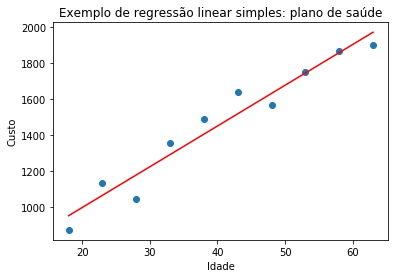

In [0]:
# -- exemplo 01: custo do plano de saúde pela idade --

idades = np.array([[18], [23], [28], [33], [38], [43], [48], [53], [58], [63]])
custos = np.array([[871], [1132], [1042], [1356], [1488], [1638], [1569], [1754], [1866], [1900]])

regressor = LinearRegression()
regressor.fit(idades, custos)

# Fórmula da regressao linear simples | y = b0 + b1 * x1

b0 = regressor.intercept_
b1 = regressor.coef_

print(f'b0 - {b0}')
print(f'b1 - {b1}')

x1 = 40 # idade
previsao1_1 = b0 + b1 * x1
previsao1_2 = regressor.predict( np.array( [ [x1] ] ) )

previsoes = regressor.predict(idades)
resultados = abs(custos - previsoes)

mae = mean_absolute_error(custos, previsoes)
mse = mean_squared_error(custos, previsoes)

print()
print(f'previsao1.1 = {previsao1_1}', end='\n'*2)
print(f'previsao1.2 = {previsao1_2}', end='\n'*2)
print(f'previsões \n{previsoes}', end='\n'*2)
print(f'resultados \n{resultados}', end='\n'*2)

# Usado para comparação de resultados
print(f'MEAN ABSOLUTE ERRORs - {mae}', end='\n'*2)
# Usado para o treinamento
print(f'MEAN SQUARE ERRORs - {mse}', end='\n'*2)

plt.plot(idades, custos, 'o')
plt.plot(idades, previsoes, color='red')
plt.title('Exemplo de regressão linear simples: plano de saúde')
plt.xlabel('Idade')
plt.ylabel('Custo')
print()

> # **Aula 010** - Regressão linear com Tensorflow - **Tensorflow: Regressão Linear**

b0_final - 0.07428547301742625
b1_final - 0.9372642449548462

previsoes 
[[-1.39412539]
 [-1.06781187]
 [-0.74149834]
 [-0.41518482]
 [-0.08887129]
 [ 0.23744224]
 [ 0.56375576]
 [ 0.89006929]
 [ 1.21638281]
 [ 1.54269634]]

previsao - [[1475.59752244]]
MEAN ABSOLUTE ERROR - 68.16756323656752
MEAN SQUARE ERROR - 7165.807892089784



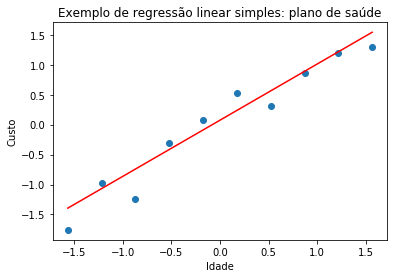

In [0]:
# -- exemplo 01: custo do plano de saúde pela idade --

idades = np.array([[18], [23], [28], [33], [38], [43], [48], [53], [58], [63]])
custos = np.array([[871], [1132], [1042], [1356], [1488], [1638], [1569], [1754], [1866], [1900]])

# Escalonamento dos dados
scaler_idades = StandardScaler()
idades = scaler_idades.fit_transform(idades)
scaler_custos = StandardScaler()
custos = scaler_custos.fit_transform(custos)

# Fórmula da regressao linear simples | y = b0 + b1 * x1

np.random.seed(0)
x, y = np.around(np.random.rand(2), 2) # apenas duas casas decimais

b0 = tf.Variable(x, name='b0')
b1 = tf.Variable(y, name='b1')
init = tf.global_variables_initializer()

# cálculo do erro
erro = tf.losses.mean_squared_error(custos, (b0 + b1 * idades))
# otimizador com descida do gradiente
otimizador = tf.train.GradientDescentOptimizer(learning_rate = 0.001)
# treinamento para minimizar o erro
treinamento = otimizador.minimize(erro)

with tf.Session() as sess:
  sess.run(init)
  #print(f'sess.run(b0) - {sess.run(b0)}')
  #print(f'sess.run(b1) - {sess.run(b1)}')
  epocas = 1000 # quantidade de treinamento
  for i in range(epocas):
    sess.run(treinamento)
  b0_final, b1_final = sess.run([b0, b1])

print(f'b0_final - {b0_final}')
print(f'b1_final - {b1_final}', end='\n'*2)

previsoes = b0_final + b1_final * idades
print(f'previsoes \n{previsoes}')

plt.plot(idades, custos, 'o')
plt.plot(idades, previsoes, color='r')
plt.title('Exemplo de regressão linear simples: plano de saúde')
plt.xlabel('Idade')
plt.ylabel('Custo')

print()
idade = scaler_idades.transform([[40]]) # escalonando a idade
previsao = scaler_custos.inverse_transform( b0_final + b1_final * idade )
print(f'previsao - {previsao}')

custos1 = scaler_custos.inverse_transform(custos)
previsoes1 = scaler_custos.inverse_transform(previsoes)

mae = mean_absolute_error(custos1, previsoes1)
mse = mean_squared_error(custos1, previsoes1)

print(f'MEAN ABSOLUTE ERROR - {mae}')
print(f'MEAN SQUARE ERROR - {mse}', end='\n'*2)

> # **Aula 011** - Previsão do preço de casas - **Tensorflow: Regressão Linear**

b0_final - -0.003073286495403957
b1_final - 0.6989380089436016

previsoes 
[[-0.68791723]
 [ 0.36990404]
 [-0.99993645]
 ...
 [-0.80968082]
 [-0.36828778]
 [-0.80968082]]

MEAN ABSOLUTE ERROR - 173392.87473433005



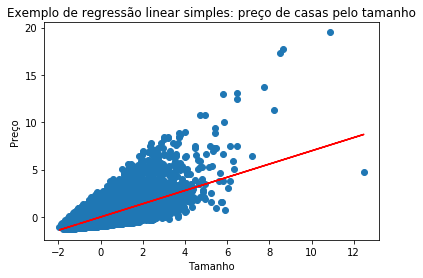

In [0]:
# recuperando a coluna com os tamanhos das casas
tamanho_casa = base.iloc[:, 5:6].values
# recuperando a coluna com os preços das casas
preco_casa = base.iloc[:, 2:3].values

# escalonando valores
scaler_tamanho = StandardScaler()
tamanho_casa = scaler_tamanho.fit_transform(tamanho_casa)
scaler_preco = StandardScaler()
preco_casa = scaler_preco.fit_transform(preco_casa)

# Fórmula da regressao linear simples | y = b0 + b1 * x1

np.random.seed(1)
x, y = np.around(np.random.rand(2), 2)

b0 = tf.Variable(x, name='b0')
b1 = tf.Variable(y, name='b1')
init = tf.global_variables_initializer()

# batch_size serve para não sobrecarregar os métodos passando toda base de dados, é como um buffer 
batch_size = 32
preco_casa_ph = tf.placeholder(tf.float64, [batch_size, 1])
tamanho_casa_ph = tf.placeholder(tf.float64, [batch_size, 1])

preco_casa_modelo = b0 + b1 * tamanho_casa_ph

erro = tf.losses.mean_squared_error(preco_casa_ph, preco_casa_modelo)
otimizador = tf.train.GradientDescentOptimizer(learning_rate = 0.001)
treinamento = otimizador.minimize(erro)

with tf.Session() as sess:
  sess.run(init)
  epocas = 10000
  for i in range(epocas):
    indices = np.random.randint(base_size[0], size = batch_size)
    feed = {tamanho_casa_ph: tamanho_casa[indices], preco_casa_ph: preco_casa[indices]}
    sess.run(treinamento, feed_dict = feed)
  b0_final, b1_final = sess.run([b0, b1])

print(f'b0_final - {b0_final}')
print(f'b1_final - {b1_final}', end='\n'*2)

previsoes = b0_final + b1_final * tamanho_casa
print(f'previsoes \n{previsoes}', end='\n'*2)

plt.plot(tamanho_casa, preco_casa, 'o')
plt.plot(tamanho_casa, previsoes, color='r')
plt.title('Exemplo de regressão linear simples: preço de casas pelo tamanho')
plt.xlabel('Tamanho')
plt.ylabel('Preço')

preco_casas1 = scaler_preco.inverse_transform(preco_casa)
previsoes1 = scaler_preco.inverse_transform(previsoes)

mae = mean_absolute_error(preco_casas1, previsoes1)
print(f'MEAN ABSOLUTE ERROR - {mae}', end='\n'*2)

> # **Aula 012** - Regressão linear simples com Estimators - **Tensorflow: Regressão Linear**

In [0]:
# recuperando a coluna com os tamanhos das casas
tamanho_casa = base.iloc[:, 5:6].values
# recuperando a coluna com os preços das casas
preco_casa = base.iloc[:, 2:3].values

# escalonando dados
scaler_tamanho = StandardScaler()
tamanho_casa = scaler_tamanho.fit_transform(tamanho_casa)
scaler_preco = StandardScaler()
preco_casa = scaler_preco.fit_transform(preco_casa)

colunas = [tf.feature_column.numeric_column('tamanho_casa', shape=[1])]

regressor = tf.estimator.LinearRegressor(feature_columns = colunas)

tamanho_casa_treinamento, tamanho_casa_teste, preco_casa_treinamento, preco_casa_teste = train_test_split(tamanho_casa, preco_casa, test_size = 0.3)
funcao_treinamento = tf.estimator.inputs.numpy_input_fn({'tamanho_casa': tamanho_casa_treinamento}, preco_casa_treinamento, batch_size = 32, num_epochs = None, shuffle = True)
funcao_teste = tf.estimator.inputs.numpy_input_fn({'tamanho_casa': tamanho_casa_teste}, preco_casa_teste, batch_size = 32, num_epochs = 1000, shuffle = False)

regressor.train(input_fn=funcao_treinamento, steps = 10000)

metricas_treinamento = regressor.evaluate(input_fn = funcao_treinamento, steps = 10000)
print(metricas_treinamento)
metricas_teste = regressor.evaluate(input_fn = funcao_teste, steps = 10000)
print(metricas_teste)

novas_casas = np.array([[800], [900], [1000]])
novas_casas = scaler_tamanho.transform(novas_casas)

funcao_previsao = tf.estimator.inputs.numpy_input_fn({'tamanho_casa':novas_casas}, shuffle = False)
previsoes = regressor.predict(input_fn = funcao_previsao)

for p in previsoes:
  print(scaler_preco.inverse_transform(p['predictions']))

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpo5z5rai5', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f5cfb3f1f60>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done c

> # **Aula 013** - Regressão linear multipla com Estimators - **Tensorflow: Regressão Linear**

In [0]:
colunas_usadas = ['price', 'bedrooms', 'bathrooms', 'sqft_living',
                  'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
                  'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
                  'lat', 'long']

base = pd.read_csv('house-prices.csv', usecols = colunas_usadas)

# normalizando os dados
scaler_attrs = MinMaxScaler()

base[['bedrooms', 'bathrooms', 'sqft_living',
      'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
      'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
      'lat', 'long']] = scaler_attrs.fit_transform(base[['bedrooms', 'bathrooms', 'sqft_living',
                                                    'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
                                                    'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
                                                    'lat', 'long']])

scaler_preco = MinMaxScaler()
base[['price']] = scaler_preco.fit_transform(base[['price']])

In [0]:
base.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,0.019266,0.090909,0.12500,0.067170,0.003108,0.0,0.0,0.0,0.5,0.500000,0.097588,0.000000,0.478261,0.000000,0.893939,0.571498,0.217608
1,0.060721,0.090909,0.28125,0.172075,0.004072,0.4,0.0,0.0,0.5,0.500000,0.206140,0.082988,0.443478,0.988089,0.626263,0.908959,0.166113
2,0.013770,0.060606,0.12500,0.036226,0.005743,0.0,0.0,0.0,0.5,0.416667,0.052632,0.000000,0.286957,0.000000,0.136364,0.936143,0.237542
3,0.069377,0.121212,0.37500,0.126038,0.002714,0.0,0.0,0.0,1.0,0.500000,0.083333,0.188797,0.565217,0.000000,0.681818,0.586939,0.104651
4,0.057049,0.090909,0.25000,0.104906,0.004579,0.0,0.0,0.0,0.5,0.583333,0.152412,0.000000,0.756522,0.000000,0.368687,0.741354,0.393688


In [0]:
casa_attrs = base.drop('price', axis = 1) # todos atributos da base menos o preço (axis = 1 apaga toda coluna)
casa_preco = base.price

previsores_colunas = colunas_usadas[1:17]

colunas = [tf.feature_column.numeric_column(key = c) for c in previsores_colunas]

casa_treinamento, casa_teste, preco_treinamento, preco_teste = train_test_split(casa_attrs, casa_preco, test_size = 0.3)

funcao_treinamento = tf.estimator.inputs.pandas_input_fn(x = casa_treinamento, y = preco_treinamento,
                                                         batch_size = 32, num_epochs = None, shuffle = True)

funcao_teste = tf.estimator.inputs.pandas_input_fn(x = casa_teste, y = preco_teste, batch_size = 32,
                                                   num_epochs = 10000, shuffle = False)

regressor = tf.estimator.LinearRegressor(feature_columns = colunas)

regressor.train(input_fn = funcao_treinamento, steps = 10000)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpoi5gxi7i', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f5cf5ef5320>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done c

In [0]:
metricas_treinamento = regressor.evaluate(input_fn = funcao_treinamento, steps = 10000)
metricas_testes = regressor.evaluate(input_fn = funcao_teste, steps = 10000)
print()
print(metricas_treinamento)
print(metricas_teste)

In [0]:
funcao_previsao = tf.estimator.inputs.pandas_input_fn(x = casa_teste, shuffle = False)
previsoes = regressor.predict(input_fn = funcao_previsao)

valores_previsoes = []
for p in previsoes:
  valores_previsoes.append(p['predictions'])

# convertento de lista para uma matriz numpy
valores_previsoes = np.asarray(valores_previsoes).reshape(-1, 1)
preco_teste_2 = preco_teste.values.reshape(-1, 1)

# voltando aos valores originais
valores_previsoes = scaler_preco.inverse_transform(valores_previsoes)
preco_teste_2 = scaler_preco.inverse_transform(preco_teste_2)

# comparando as previsões com os testes
mae = mean_absolute_error(preco_teste_2, valores_previsoes)
print(f'\nMEAN ABSOLUTE ERROR - {mae}')

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpoi5gxi7i/model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.

MEAN ABSOLUTE ERROR - 127233.35195672225
